In [1]:
%matplotlib inline
import pandas as pd

In [2]:
import pandas as pd
titles = pd.read_csv('titles.csv', index_col=None)
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [3]:
import pandas as pd

cast = pd.read_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# 1. What are the ten most common movie names of all time?

In [5]:
title_counts = titles['title'].value_counts()

top_10_common_titles = title_counts.head(10)

print(top_10_common_titles)

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Maya                    12
Temptation              12
Freedom                 11
Honeymoon               11
Othello                 11
The Three Musketeers    11
Name: title, dtype: int64


# 2. Which three years of the 1930s saw the most films released?

In [7]:
movies_1930s = titles[(titles['year'] >= 1930) & (titles['year'] <= 1939)]
top_3_years=movies_1930s.head(3)
print(top_3_years)

                title  year
13            Big Boy  1930
14    Come On, Tarzan  1932
19  One Night of Love  1934


# 3. Plot the number of films that have been released each decade over the history of cinema.

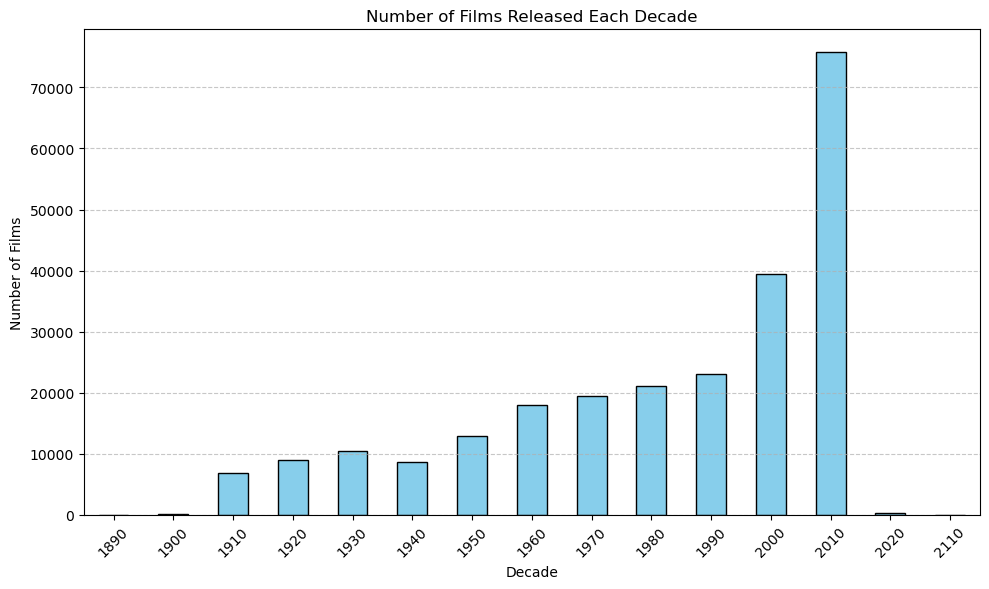

In [8]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'titles' with a 'year' column
# Group the DataFrame by decade (using // 10 to extract the decade)
decades = (titles['year'] // 10) * 10

# Count the number of films in each decade
film_counts_by_decade = decades.value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
film_counts_by_decade.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Films Released Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# 4. Plot the number of "Hamlet" films made each decade.

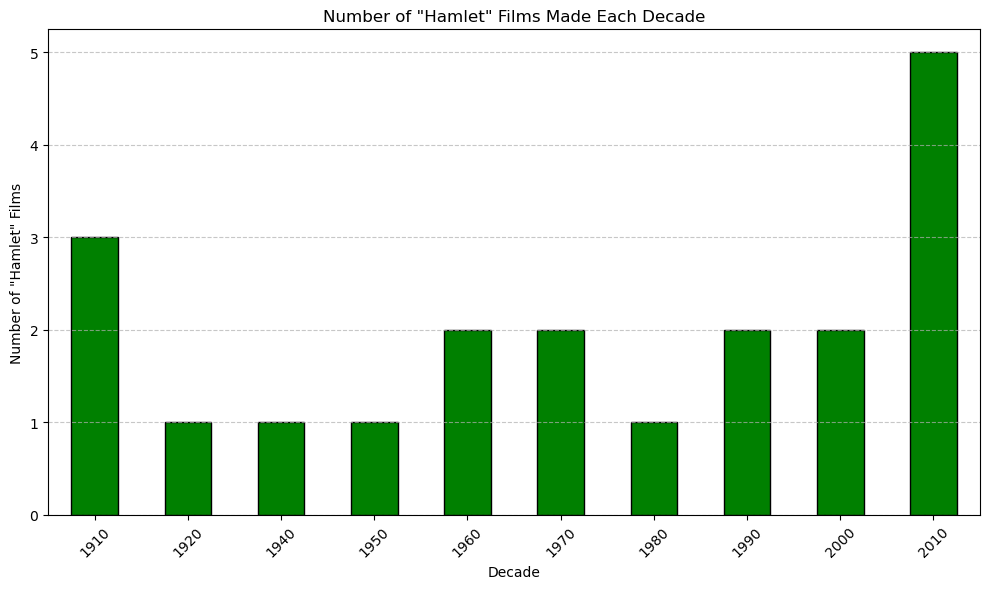

In [9]:
hamlet_films = titles[titles['title'] == 'Hamlet']

# Group the filtered DataFrame by decade (using // 10 to extract the decade)
decades = (hamlet_films['year'] // 10) * 10

# Count the number of "Hamlet" films in each decade
hamlet_counts_by_decade = decades.value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
hamlet_counts_by_decade.plot(kind='bar', color='green', edgecolor='black')
plt.title('Number of "Hamlet" Films Made Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of "Hamlet" Films')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# 5. Plot the number of "Rustler" characters in each decade of the history of film.

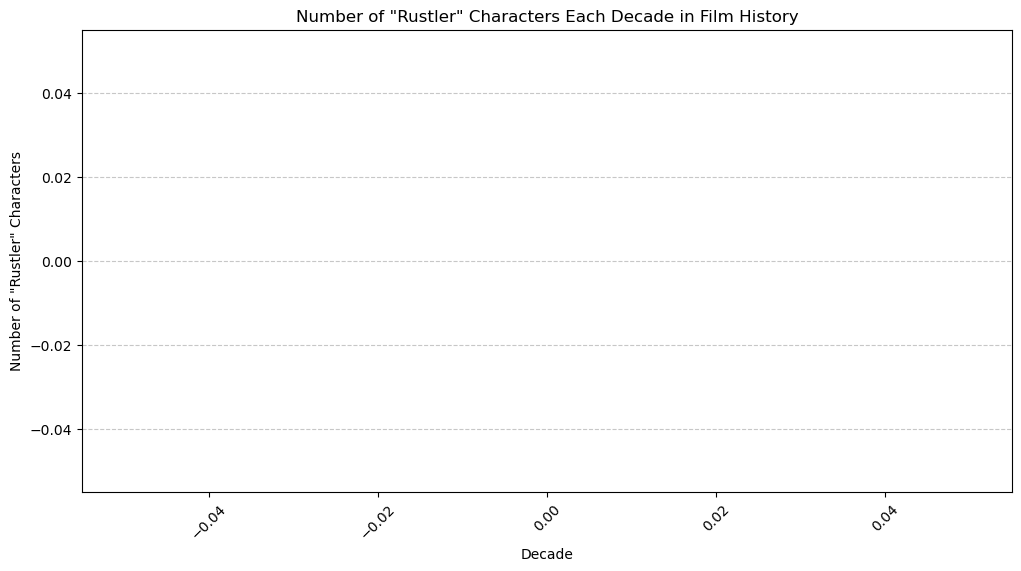

In [11]:
rustler_characters = titles[titles['title'] == 'Rustler']

rustler_yearly_counts = rustler_characters['year'].value_counts().reset_index()
rustler_yearly_counts.columns = ['year', 'count']

def round_to_decade(year):
    return int(year // 10 * 10)

rustler_yearly_counts['decade'] = rustler_yearly_counts['year'].apply(round_to_decade)

rustler_decade_counts = rustler_yearly_counts.groupby('decade')['count'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(rustler_decade_counts['decade'], rustler_decade_counts['count'], width=5, align='center')
plt.xlabel('Decade')
plt.ylabel('Number of "Rustler" Characters')
plt.title('Number of "Rustler" Characters Each Decade in Film History')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 6. Plot the number of "Hamlet" characters each decade.

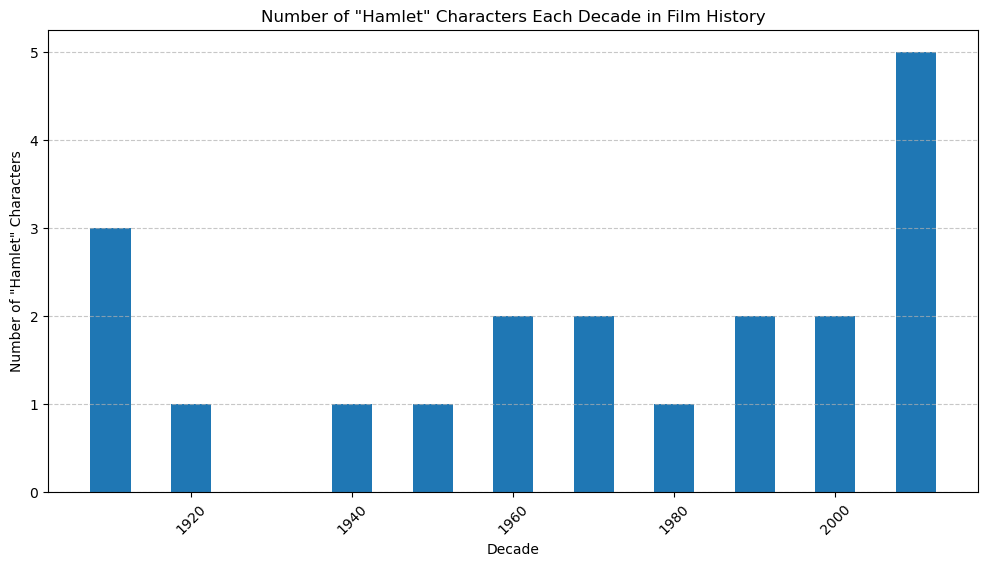

In [13]:

hamlet_characters = titles[titles['title'] == 'Hamlet']

hamlet_yearly_counts = hamlet_characters['year'].value_counts().reset_index()
hamlet_yearly_counts.columns = ['year', 'count']

def round_to_decade(year):
    return int(year // 10 * 10)

hamlet_yearly_counts['decade'] = hamlet_yearly_counts['year'].apply(round_to_decade)

hamlet_decade_counts = hamlet_yearly_counts.groupby('decade')['count'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(hamlet_decade_counts['decade'], hamlet_decade_counts['count'], width=5, align='center')
plt.xlabel('Decade')
plt.ylabel('Number of "Hamlet" Characters')
plt.title('Number of "Hamlet" Characters Each Decade in Film History')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 7. What are the 11 most common character names in movie history?

In [4]:
character_counts = cast['character'].value_counts().reset_index()

# Rename the columns for clarity
character_counts.columns = ['Character', 'Count']

# Display the top 11 most common character names
top_11_characters = character_counts.head(11)
print(top_11_characters)

      Character  Count
0       Himself  20746
1        Dancer  12477
2         Extra  11948
3      Reporter   8434
4       Student   7773
5        Doctor   7669
6   Party Guest   7245
7     Policeman   7029
8         Nurse   6999
9     Bartender   6802
10      Herself   6705


# 8. Who are the 10 people most often credited as "Herself" in film history?

In [15]:
cast = pd.read_csv('cast.csv')
herself_credits = cast[cast['character'] == 'Herself']

herself_credit_counts = herself_credits['name'].value_counts().reset_index()
herself_credit_counts.columns = ['Person', 'Count']

top_10_herself_credits = herself_credit_counts.head(10)

print(top_10_herself_credits)

                      Person  Count
0         Queen Elizabeth II     12
1             Joyce Brothers      9
2                Luisa Horga      9
3     Mar?a Luisa (V) Mart?n      9
4          Margaret Thatcher      8
5            Hillary Clinton      8
6           In?s J. Southern      6
7  Mar?a Isabel (III) Mart?n      6
8             Marta Berrocal      6
9                Sumie Sakai      6


# 9. Who are the 10 people most often credited as "Himself" in film history?

In [16]:
cast = pd.read_csv('cast.csv')

himself_credits = cast[cast['character'] == 'Himself']

himself_credit_counts = himself_credits['name'].value_counts().reset_index()
himself_credit_counts.columns = ['Person', 'Count']

top_10_himself_credits = himself_credit_counts.head(10)

print(top_10_himself_credits)

                  Person  Count
0           Adolf Hitler     99
1          Richard Nixon     44
2          Ronald Reagan     41
3        John F. Kennedy     37
4         George W. Bush     25
5      Winston Churchill     24
6     Martin Luther King     23
7             Ron Jeremy     22
8           Bill Clinton     22
9  Franklin D. Roosevelt     21


# 10. Which actors or actresses appeared in the most movies in the year 1945?

In [18]:
movies_1945 = cast[cast['year'] == 1945]

actor_appearances = movies_1945['name'].value_counts().reset_index()
actor_appearances.columns = ['Actor/Actress', 'Number of Appearances']

most_appearances = actor_appearances.head(3)

print(most_appearances)

     Actor/Actress  Number of Appearances
0     Emmett Vogan                     39
1  Sam (II) Harris                     33
2     Bess Flowers                     29


# 11. Which actors or actresses appeared in the most movies in the year 1985?

In [20]:
movies_1985 = cast[cast['year'] == 1985]

# Count the number of appearances for each actor or actress
actor_appearances = movies_1985['name'].value_counts().reset_index()
actor_appearances.columns = ['Actor/Actress', 'Number of Appearances']

# Sort the DataFrame by the 'Number of Appearances' column in descending order
actor_appearances = actor_appearances.sort_values(by='Number of Appearances', ascending=False)

# Reset the index to start from 0
actor_appearances.reset_index(drop=True, inplace=True)

# Display the result
print(actor_appearances.head(3))

   Actor/Actress  Number of Appearances
0      Mammootty                     22
1  Shakti Kapoor                     21
2       Sukumari                     20


# 12. Plot how many roles Mammootty has played in each year of his career.

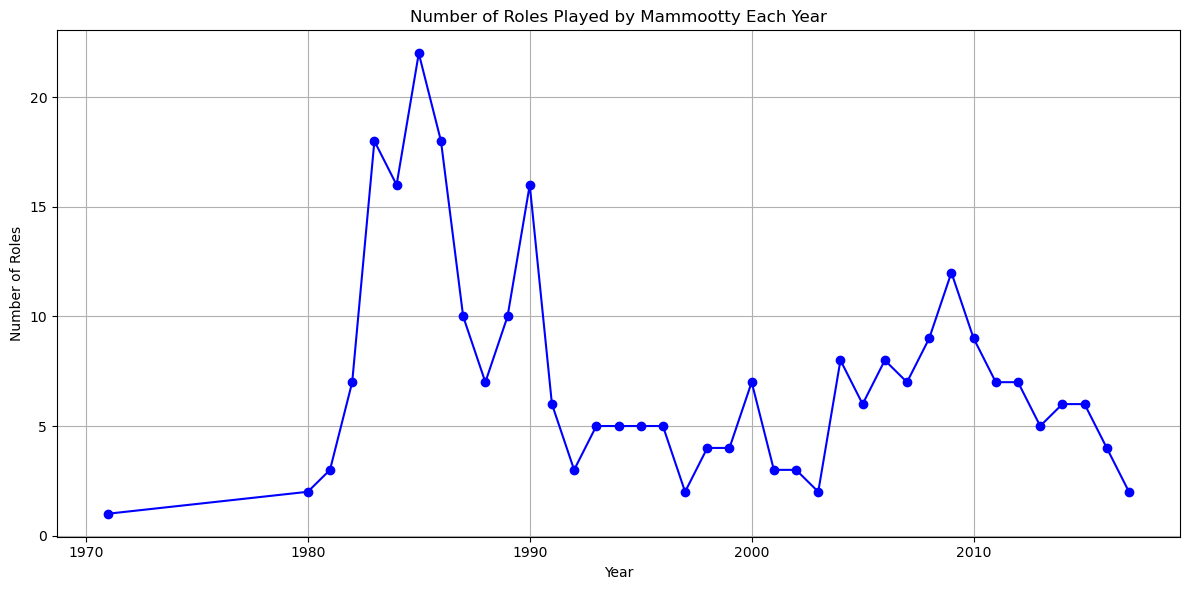

In [22]:
mammootty_roles = cast[cast['name'] == 'Mammootty']

# Group the filtered DataFrame by the 'year' column and count the number of roles each year
mammootty_roles_by_year = mammootty_roles['year'].value_counts().sort_index()

# Create a line plot to visualize the number of roles each year
plt.figure(figsize=(12, 6))
plt.plot(mammootty_roles_by_year.index, mammootty_roles_by_year.values, marker='o', linestyle='-', color='blue')
plt.title('Number of Roles Played by Mammootty Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# 14. What are the 10 most frequent roles that start with the word "Science"?

In [23]:
science_roles = cast[cast['character'].str.startswith('Science')]

# Count the number of occurrences for each role
science_roles_counts = science_roles['character'].value_counts().reset_index()
science_roles_counts.columns = ['Role', 'Frequency']

# Select the top 10 most frequent roles that start with "Science"
top_10_science_roles = science_roles_counts.head(10)

# Display the result
print(top_10_science_roles)

                   Role  Frequency
0       Science Teacher         60
1       Science Student          9
2  Science Fair Student          9
3    Science Fair Judge          6
4      Science Fair Kid          5
5      Science Reporter          5
6           Science Kid          5
7   Science Club Member          5
8   Science Promo Cadet          5
9               Science          4


# 15. Plot the n-values of the roles that Judi Dench has played over her career.

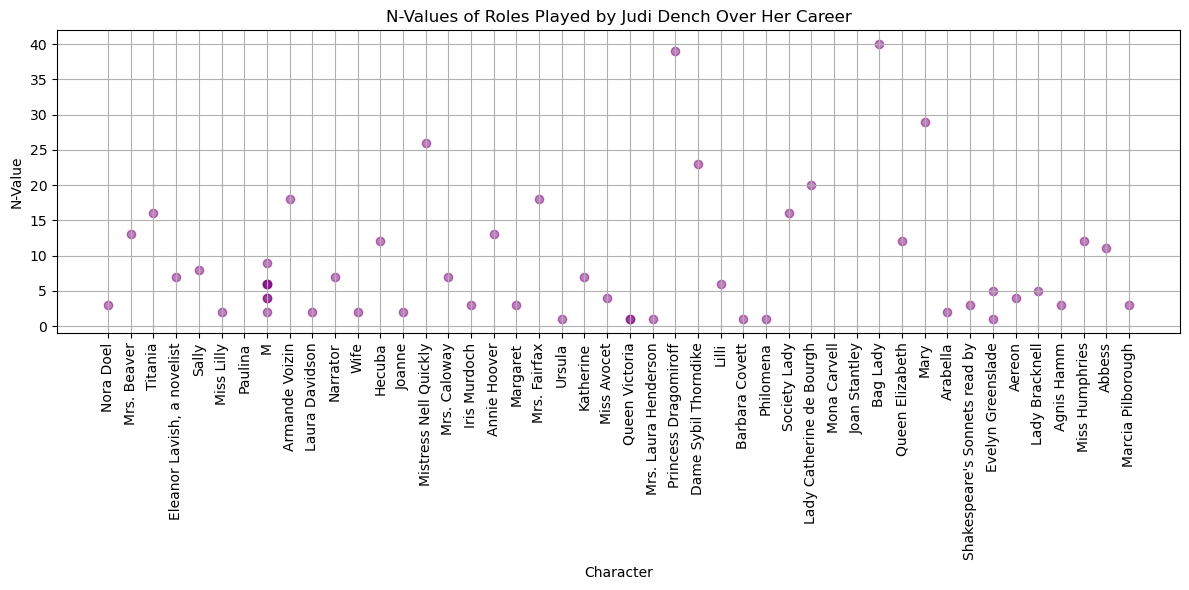

In [24]:
judi_dench_roles = cast[cast['name'] == 'Judi Dench']

# Select the 'character' and 'n' columns for Judi Dench's roles
judi_dench_n_values = judi_dench_roles[['character', 'n']]

# Create a scatter plot to visualize the n-values of her roles
plt.figure(figsize=(12, 6))
plt.scatter(judi_dench_n_values['character'], judi_dench_n_values['n'], color='purple', alpha=0.5)
plt.title('N-Values of Roles Played by Judi Dench Over Her Career')
plt.xlabel('Character')
plt.ylabel('N-Value')
plt.xticks(rotation=90)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# 16. Plot the n-values of Cary Grant's roles through his career.

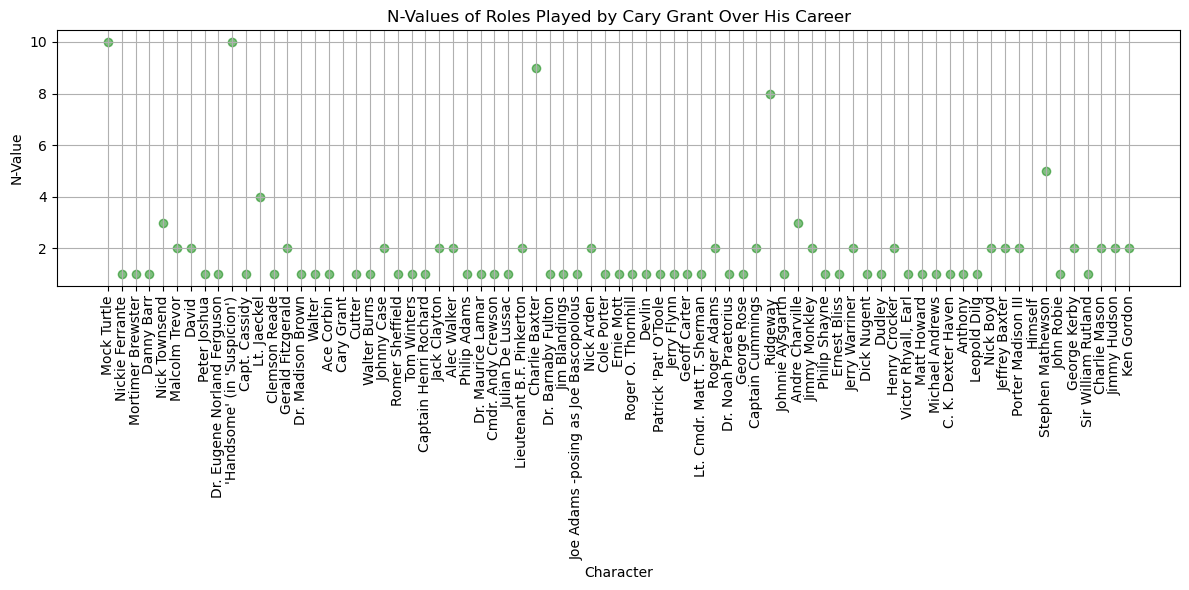

In [25]:
cary_grant_roles = cast[cast['name'] == 'Cary Grant']

# Select the 'character' and 'n' columns for Cary Grant's roles
cary_grant_n_values = cary_grant_roles[['character', 'n']]

# Create a scatter plot to visualize the n-values of his roles
plt.figure(figsize=(12, 6))
plt.scatter(cary_grant_n_values['character'], cary_grant_n_values['n'], color='green', alpha=0.5)
plt.title('N-Values of Roles Played by Cary Grant Over His Career')
plt.xlabel('Character')
plt.ylabel('N-Value')
plt.xticks(rotation=90)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# 17. Plot the n-value of the roles that Sidney Poitier has acted over the years.

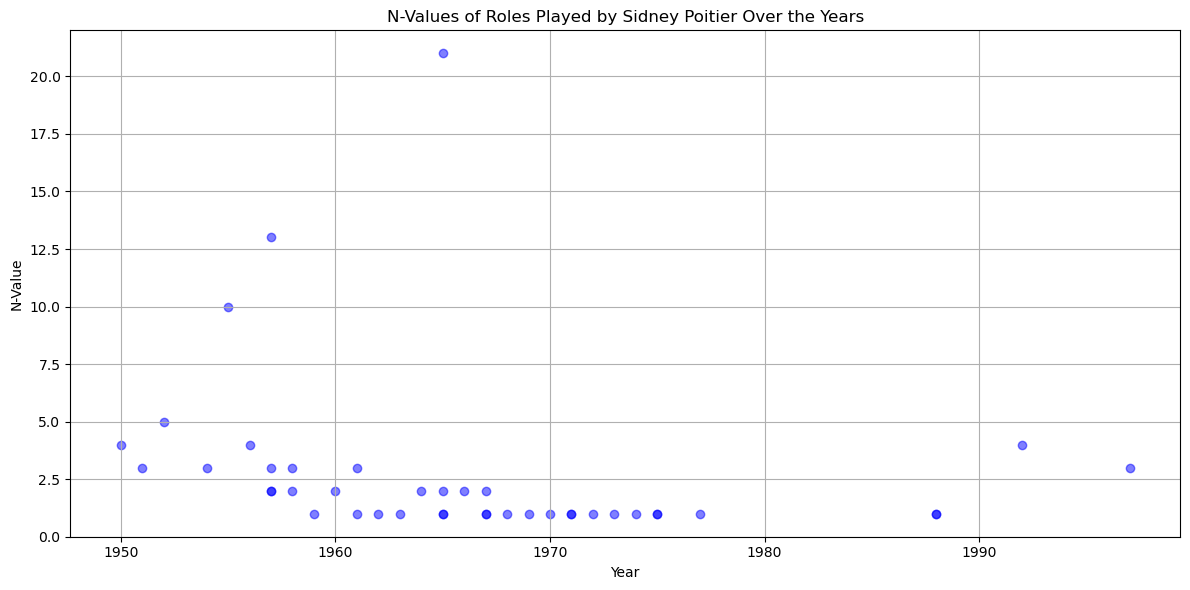

In [28]:
sidney_poitier_roles = cast[cast['name'] == 'Sidney Poitier']

# Select the 'year' and 'n' columns for Sidney Poitier's roles
sidney_poitier_n_values = sidney_poitier_roles[['year', 'n']]

# Create a scatter plot to visualize the n-values of his roles over the years
plt.figure(figsize=(12, 6))
plt.scatter(sidney_poitier_n_values['year'], sidney_poitier_n_values['n'], color='blue', alpha=0.5)
plt.title('N-Values of Roles Played by Sidney Poitier Over the Years')
plt.xlabel('Year')
plt.ylabel('N-Value')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# 18. How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [29]:
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

# Count the number of leading roles (n=1) for actors and actresses
leading_roles_actors = roles_1950s[(roles_1950s['n'] == 1) & (roles_1950s['type'] == 'actor')]
leading_roles_actresses = roles_1950s[(roles_1950s['n'] == 1) & (roles_1950s['type'] == 'actress')]

# Get the counts
count_leading_roles_actors = len(leading_roles_actors)
count_leading_roles_actresses = len(leading_roles_actresses)

# Display the results
print("Number of leading roles (n=1) available to actors in the 1950s:", count_leading_roles_actors)
print("Number of leading roles (n=1) available to actresses in the 1950s:", count_leading_roles_actresses)

Number of leading roles (n=1) available to actors in the 1950s: 6692
Number of leading roles (n=1) available to actresses in the 1950s: 3040


# 19. How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [30]:
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

# Count the number of supporting roles (n=2) for actors and actresses
supporting_roles_actors = roles_1950s[(roles_1950s['n'] == 2) & (roles_1950s['type'] == 'actor')]
supporting_roles_actresses = roles_1950s[(roles_1950s['n'] == 2) & (roles_1950s['type'] == 'actress')]

# Get the counts
count_supporting_roles_actors = len(supporting_roles_actors)
count_supporting_roles_actresses = len(supporting_roles_actresses)

# Display the results
print("Number of supporting roles (n=2) available to actors in the 1950s:", count_supporting_roles_actors)
print("Number of supporting roles (n=2) available to actresses in the 1950s:", count_supporting_roles_actresses)

Number of supporting roles (n=2) available to actors in the 1950s: 4640
Number of supporting roles (n=2) available to actresses in the 1950s: 4635
